In [ ]:
# DECISION TREES 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_path = 'Resources/Stroke_dataset.csv'
df_stroke_cleaned = pd.read_csv(file_path)

# Step 2: Handle missing values for 'bmi' using mean imputation
imputer = SimpleImputer(strategy='mean')
df_stroke_cleaned['bmi'] = imputer.fit_transform(df_stroke_cleaned[['bmi']])

# Step 3: Encode categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoders = {col: LabelEncoder() for col in categorical_cols}
for col, encoder in encoders.items():
    df_stroke_cleaned[col] = encoder.fit_transform(df_stroke_cleaned[col])

# Step 4: Define features and target variable
X = df_stroke_cleaned.drop(columns=['id', 'stroke'])  # Exclude 'id' column
y = df_stroke_cleaned['stroke']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit depth to avoid overfitting
clf.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.20      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.58      0.51      0.50      1533
weighted avg       0.91      0.95      0.93      1533



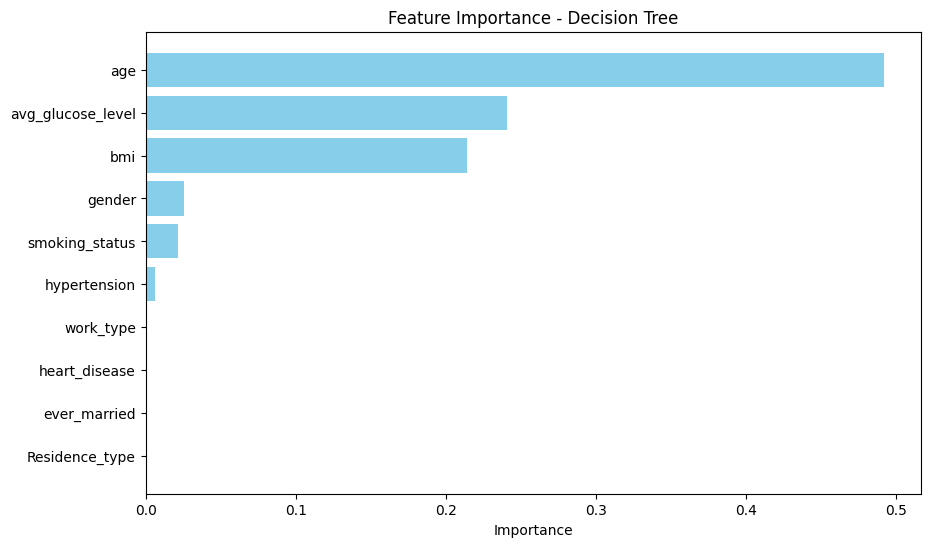

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance from the Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  
plt.show()


Key Metrics in the Classification Report:
Precision:

Precision for Class 0 (No Stroke): 0.95
This means that when the model predicts "no stroke" (class 0), it is correct 95% of the time.
Precision for Class 1 (Stroke): 0.20
This indicates that when the model predicts "stroke" (class 1), it is correct only 20% of the time. This is quite low, meaning there are many false positives (predictions of stroke when no stroke is actually present).
Recall:

Recall for Class 0 (No Stroke): 1.00
The model correctly identifies all instances of "no stroke" (100% recall). It does not miss any of the true negatives.
Recall for Class 1 (Stroke): 0.01
The recall for stroke is extremely low, indicating that the model misses almost all of the true stroke cases (only 1% of the actual stroke cases are correctly identified).
F1-Score:

F1-Score for Class 0 (No Stroke): 0.97
The F1-score is a balance between precision and recall. For class 0, it's quite high, reflecting a good balance between precision and recall for "no stroke."
F1-Score for Class 1 (Stroke): 0.03
The F1-score for stroke is very low because of the poor precision and recall for class 1. The model is not effectively detecting strokes, likely due to a class imbalance.
Support:

Support for Class 0 (No Stroke): 1458
There are 1458 samples of "no stroke" in your dataset.
Support for Class 1 (Stroke): 75
There are only 75 samples of "stroke," which suggests an imbalanced dataset, with far fewer stroke cases than no stroke cases.
Overall Metrics:
Accuracy: 0.95

The model has an overall accuracy of 95%, which may seem good at first glance. However, accuracy alone isn't a great metric, especially in cases with class imbalance like this one. A model could achieve high accuracy by simply predicting the majority class (no stroke) and ignoring the minority class (stroke).
Macro Average:

Precision: 0.58
Recall: 0.51
F1-Score: 0.50
The macro average is calculated by averaging the performance across both classes (without considering their support). These values reflect the poor performance for class 1 (stroke), as they are heavily influenced by the low recall for stroke.
Weighted Average:

Precision: 0.91
Recall: 0.95
F1-Score: 0.93
The weighted average takes into account the support of each class. Since class 0 (no stroke) has a much higher support (1458) than class 1 (stroke), the weighted average metrics are higher, reflecting the model's better performance on the majority class.
Interpretation of Results:
The model is very good at identifying no stroke cases (class 0), but it performs poorly for stroke cases (class 1).
Precision and recall for class 1 (stroke) are extremely low, especially recall (0.01), meaning the model fails to identify most of the true stroke cases.
This is likely due to class imbalance—with only 75 stroke cases and 1458 no-stroke cases, the model might be biased toward predicting the majority class (no stroke).
Accuracy of 95% seems high but is misleading in this context because the model is biased toward predicting "no stroke" and fails to detect most stroke cases.
What can be done?
Address class imbalance: Use techniques like oversampling the minority class (stroke), undersampling the majority class (no stroke), or using weighted loss functions in your model.
Consider additional metrics: Focus on recall for class 1 (stroke) if detecting stroke cases is more important than classifying "no stroke" cases.


compari